In [7]:
import cv2 as cv
import os
import paddle


class GOALS2022Dataset(paddle.io.Dataset):
    def __init__(self, mode):
        self.mode = mode
        if mode == "Train":
            self.lbound = 1
            self.rbound = 100
        elif mode == "Validation":
            self.lbound = 101
            self.rbound = 200

    def __getitem__(self, i):
        if os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 0
        elif os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 1
        else:
            raise FileNotFoundError

    def __len__(self):
        return self.rbound - self.lbound + 1


train_data = GOALS2022Dataset("Train")
eval_data = GOALS2022Dataset("Validation")
model = paddle.Model(paddle.vision.models.vgg11(num_classes=2))
model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy(),
)
model.fit(train_data, batch_size=32, epochs=100, verbose=1)
model.evaluate(eval_data)
model.save('model')
model.summary()

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/100
step 4/4 [==============================] - loss: 3.1664 - acc: 0.5200 - 481ms/step
Epoch 2/100
step 4/4 [==============================] - loss: 0.7905 - acc: 0.5500 - 561ms/step
Epoch 3/100
step 4/4 [==============================] - loss: 0.0520 - acc: 0.8400 - 480ms/step
Epoch 4/100
step 4/4 [==============================] - loss: 0.2334 - acc: 0.7400 - 450ms/step
Epoch 5/100
step 4/4 [==============================] - loss: 0.0354 - acc: 1.0000 - 452ms/step
Epoch 6/100
step 4/4 [==============================] - loss: 8.3147e-06 - acc: 1.0000 - 452ms/step
Epoch 7/100
step 4/4 [==============================] - loss: 0.0000e+00 - acc: 1.0000 - 443ms/step
Epoch 8/100
step 4/4 [==============================] - loss: 0.0000e+00 - acc: 0.9900 - 466ms/step
Epoch 9/100
step 4/4 [==============================] - loss: 0.0098 - acc: 0.8300 - 451ms/step
Epoch 10/100
s

{'total_params': 128774530, 'trainable_params': 128774530}

In [2]:
%pip install interpretdl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 926.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.0 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 590.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 50.6 kB/s eta 0:00:00a 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
for i in model.network.named_sublayers():
    print(i)

('features', Sequential(
  (0): Conv2D(3, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (1): ReLU()
  (2): MaxPool2D(kernel_size=2, stride=2, padding=0)
  (3): Conv2D(64, 128, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (4): ReLU()
  (5): MaxPool2D(kernel_size=2, stride=2, padding=0)
  (6): Conv2D(128, 256, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (7): ReLU()
  (8): Conv2D(256, 256, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (9): ReLU()
  (10): MaxPool2D(kernel_size=2, stride=2, padding=0)
  (11): Conv2D(256, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (12): ReLU()
  (13): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (14): ReLU()
  (15): MaxPool2D(kernel_size=2, stride=2, padding=0)
  (16): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (17): ReLU()
  (18): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (19): ReLU()
  (20): MaxPool2D(kernel_size=2, stride=2, padding=0)
))
('fe

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/gradient_cam.py:35: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:523: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)


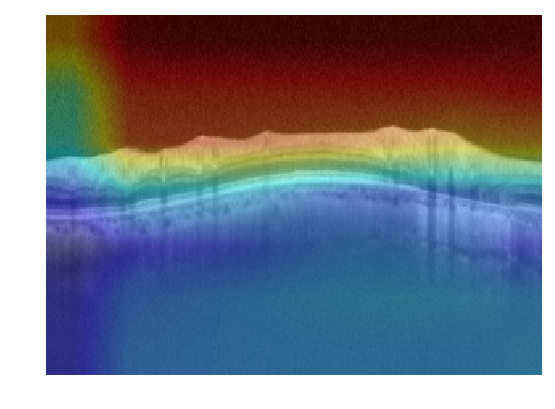

In [14]:
import interpretdl as it
sg = it.GradCAMInterpreter(model.network, use_cuda=True)
gradients = sg.interpret('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png', 'features.20')